


# SPLIT CODE

In [ ]:
#STEP 1: Install OpenCV (if not already installed)
!pip install opencv-python --quiet


In [ ]:
# ✅ STEP 2: Import libraries
import cv2
import os
from google.colab import files
from IPython.display import Image, display

In [ ]:
# # ✅ STEP 3: Upload a video file from your computer
# print("📤 Please upload your video file...")
# uploaded = files.upload()

# # Get the uploaded file name
# video_path = list(uploaded.keys())[0]
# print(f"🎞 Uploaded video: {video_path}")


In [ ]:
from google.colab import drive
from google.colab import files
import os

# ✅ STEP 1: Mount Google Drive
print("🔗 Mounting Google Drive...")
drive.mount('/content/drive')

# ✅ STEP 2: Navigate to your video folder
# (You can change this path to wherever your video is stored)
video_folder = '/content/drive/MyDrive/DSAI LAB/Videos_and_Frames'

# List files in the folder
print("📁 Files available in your Drive folder:")
for file in os.listdir(video_folder):
    print(file)

# ✅ STEP 3: Choose your video file manually
video_path = os.path.join(video_folder, input("\n🎥 Enter the exact file name of your video: "))
print(f"🎞 Selected video: {video_path}")


🔗 Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Files available in your Drive folder:
Script_file.ipynb
Example_1.mp4
Example_2.mp4
Example_3.mp4
Example_4.mp4
video_frames (1)
video_frames (2)
video_frames (3)

🎥 Enter the exact file name of your video: Example_4.mp4
🎞 Selected video: /content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_4.mp4


In [ ]:
# ✅ STEP 4 (Final): Define frame extraction function with time interval
def extract_frames(video_path, output_folder, interval_seconds=1):
    """
    Extract frames from a video at a fixed time interval and save as image files.
    Works smoothly in Google Colab.

    Args:
        video_path (str): Path to the video file.
        output_folder (str): Folder to save extracted frames.
        interval_seconds (int/float): Time gap (in seconds) between saved frames.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("❌ Error: Could not open video.")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps <= 0:
        fps = 30  # Default fallback
    frame_interval = int(fps * interval_seconds)

    frame_count = 0
    saved_count = 0
    print(f"🎞 Video FPS: {fps:.2f}")
    print(f"⏳ Extracting 1 frame every {interval_seconds} second(s)...")

    while True:
        success, frame = cap.read()
        if not success:
            break

        # Save frame every 'frame_interval' frames
        if frame_count % frame_interval == 0:
            filename = os.path.join(output_folder, f"frame_{saved_count:04d}.jpg")
            cv2.imwrite(filename, frame)
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"✅ Done! Saved {saved_count} frames (1 every {interval_seconds}s) to '{output_folder}'.")


In [ ]:
# ✅ STEP 5: Run the extraction
output_folder = "video_frames"
extract_frames(video_path, output_folder)


🎞 Video FPS: 30.00
⏳ Extracting 1 frame every 1 second(s)...
✅ Done! Saved 1887 frames (1 every 1s) to 'video_frames'.


Total frames: 2138


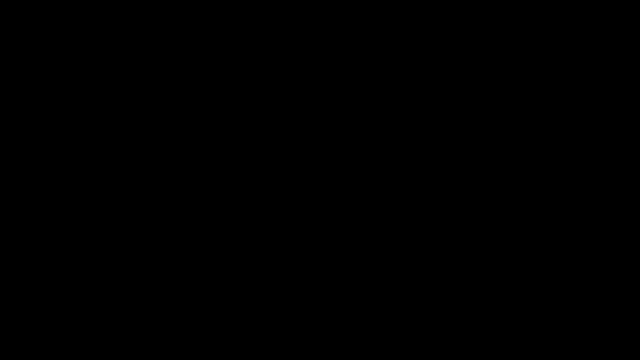

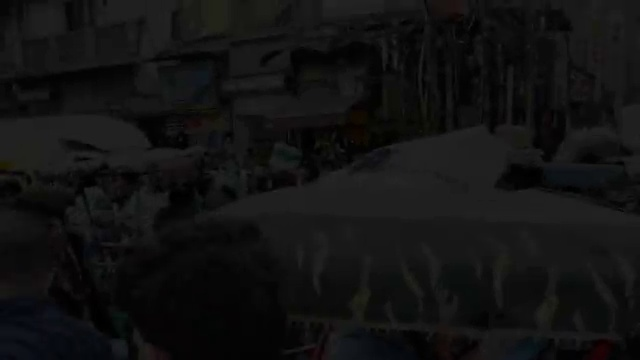

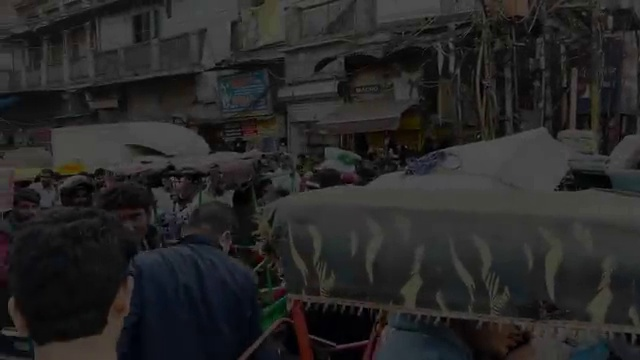

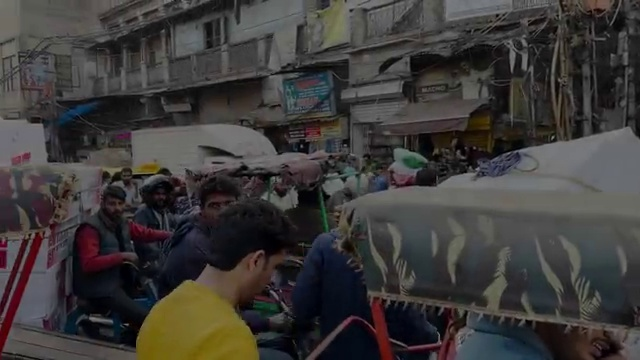

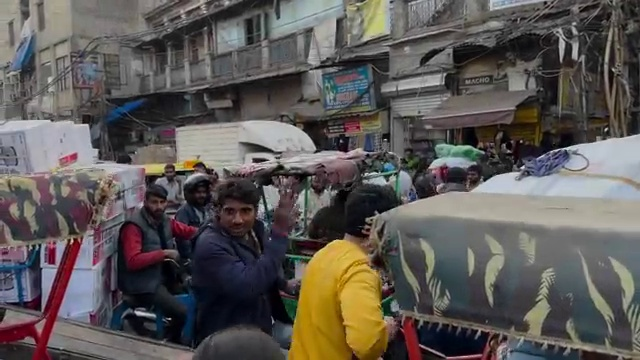

In [ ]:
# ✅ STEP 6: Preview a few frames
import glob

frame_files = sorted(glob.glob(os.path.join(output_folder, "*.jpg")))

print(f"Total frames: {len(frame_files)}")
for f in frame_files[:5]:  # show first 5 frames
    display(Image(filename=f))


In [ ]:
# ✅ STEP 7: Download frames as a ZIP file
import shutil

shutil.make_archive(output_folder, 'zip', output_folder)
files.download(output_folder + '.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



#complete code cell


In [ ]:
import cv2
import os

def video_to_frames(video_path, output_folder, interval=1):
    """
    Extract frames from a video and save them as images.

    Args:
        video_path (str): Path to input video.
        output_folder (str): Folder to save frames.
        interval (int): Save every 'interval' frame (default=1, i.e., all frames).
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % interval == 0:
            frame_filename = os.path.join(output_folder, f"frame_{saved_count:05d}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"✅ Done! Extracted {saved_count} frames into '{output_folder}'.")


def frames_to_video(frames_folder, output_video, fps=30):
    """
    Reconstruct a video from extracted frames.

    Args:
        frames_folder (str): Folder containing frames.
        output_video (str): Path to save the reconstructed video.
        fps (int): Frames per second for the output video.
    """
    # Get list of frame files sorted by name
    frame_files = sorted([
        os.path.join(frames_folder, f)
        for f in os.listdir(frames_folder)
        if f.endswith(('.jpg', '.png'))
    ])

    if not frame_files:
        print("Error: No frames found in folder.")
        return

    # Read first frame to get video dimensions
    first_frame = cv2.imread(frame_files[0])
    height, width, layers = first_frame.shape

    # Define video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    for frame_file in frame_files:
        frame = cv2.imread(frame_file)
        out.write(frame)

    out.release()
    print(f"✅ Done! Video saved as '{output_video}'.")



In [ ]:

# Step 1: Extract frames
video_to_frames("input.mp4", "frames", interval=1)

# Step 2: Reconstruct video
frames_to_video("frames", "reconstructed.mp4", fps=30)

Error: Could not open video.
Error: No frames found in folder.


# Rdetr


In [ ]:
# ✅ STEP 1: Install ultralytics if not installed
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00


In [ ]:
# ✅ STEP 2: Import dependencies
import os
from ultralytics import RTDETR
from IPython.display import Image, display
import glob


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# ✅ STEP 3: Load your model
# (make sure your weights file 'rtdetr-l.pt' is available in your working directory)
model = RTDETR("rtdetr-l.pt")


In [ ]:
# ✅ STEP 4: Define input and output folders
input_folder = "/content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_1_frames"       # folder containing extracted frames
output_folder = "/content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_1_Annotated"  # folder to save annotated frames

os.makedirs(output_folder, exist_ok=True)


In [ ]:
import os
import glob

# ✅ STEP 5 (Fixed): Process each frame and save annotated outputs
frame_paths = sorted(glob.glob(os.path.join(input_folder, "*.jpg")))
print(f"🔍 Found {len(frame_paths)} frames to process...")

for i, frame_path in enumerate(frame_paths):
    # Run inference (returns list of Results objects)
    results = model(frame_path)

    # Access the first result (since we pass one image)
    result = results[0]

    # Get the annotated image array
    annotated_img = result.plot()  # draws boxes, labels, etc.

    # Save to output folder
    out_path = os.path.join(output_folder, os.path.basename(frame_path))
    import cv2
    cv2.imwrite(out_path, annotated_img)

    # Optional progress log
    if (i + 1) % 20 == 0 or i == len(frame_paths) - 1:
        print(f"Processed {i+1}/{len(frame_paths)} frames")

print(f"✅ All annotated frames saved in: {output_folder}")


🔍 Found 1250 frames to process...

image 1/1 /content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_1_frames/frame_0000.jpg: 640x640 1 tv, 3720.4ms
Speed: 4.7ms preprocess, 3720.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_1_frames/frame_0001.jpg: 640x640 3 persons, 7 cars, 5 motorcycles, 3 trucks, 2 traffic lights, 2 handbags, 1 skateboard, 2917.0ms
Speed: 5.1ms preprocess, 2917.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_1_frames/frame_0002.jpg: 640x640 3 persons, 10 cars, 4 motorcycles, 2 trucks, 3 traffic lights, 1 handbag, 2333.0ms
Speed: 4.1ms preprocess, 2333.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_1_frames/frame_0003.jpg: 640x640 4 persons, 1 bicycle, 7 cars, 8 motorcycles, 2 trucks, 2 traffic l

In [ ]:
# ✅ STEP 6: Preview a few annotated frames
annotated_files = sorted(glob.glob(os.path.join(output_folder, "*.jpg")))
for img_path in annotated_files[:5]:
    display(Image(filename=img_path))


In [ ]:
import cv2
import os
import glob

def frames_to_video(input_folder, output_video_path, fps=30):
    """
    Combine annotated frames into a video.

    Args:
        input_folder (str): Path to folder with annotated frames.
        output_video_path (str): Output video file path (.mp4 recommended).
        fps (int or float): Frames per second for output video.
    """
    # Get all frame file paths (sorted)
    frame_paths = sorted(glob.glob(os.path.join(input_folder, "*.jpg")))
    if not frame_paths:
        print("❌ No frames found in the folder.")
        return

    # Read first frame to get dimensions
    first_frame = cv2.imread(frame_paths[0])
    height, width, layers = first_frame.shape

    # Define codec and video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use mp4 codec
    video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    print(f"🎞 Creating video from {len(frame_paths)} frames...")

    for i, frame_path in enumerate(frame_paths):
        frame = cv2.imread(frame_path)
        video.write(frame)
        if (i + 1) % 20 == 0 or i == len(frame_paths) - 1:
            print(f"Added {i+1}/{len(frame_paths)} frames")

    video.release()
    print(f"✅ Video saved at: {output_video_path}")


In [ ]:
# Combine annotated frames into video
frames_to_video(
    input_folder="/content/drive/MyDrive/DSAI LAB/Videos_and_Frames/Example_1_Annotated",
    output_video_path="/content/drive/MyDrive/DSAI LAB/annotated_video.mp4",
    fps=30  # or match your original video's fps
)


🎞 Creating video from 1250 frames...
Added 20/1250 frames
Added 40/1250 frames
Added 60/1250 frames
Added 80/1250 frames
Added 100/1250 frames
Added 120/1250 frames
Added 140/1250 frames
Added 160/1250 frames
Added 180/1250 frames
Added 200/1250 frames
Added 220/1250 frames
Added 240/1250 frames
Added 260/1250 frames
Added 280/1250 frames
Added 300/1250 frames
Added 320/1250 frames
Added 340/1250 frames
Added 360/1250 frames
Added 380/1250 frames
Added 400/1250 frames
Added 420/1250 frames
Added 440/1250 frames
Added 460/1250 frames
Added 480/1250 frames
Added 500/1250 frames
Added 520/1250 frames
Added 540/1250 frames
Added 560/1250 frames
Added 580/1250 frames
Added 600/1250 frames
Added 620/1250 frames
Added 640/1250 frames
Added 660/1250 frames
Added 680/1250 frames
Added 700/1250 frames
Added 720/1250 frames
Added 740/1250 frames
Added 760/1250 frames
Added 780/1250 frames
Added 800/1250 frames
Added 820/1250 frames
Added 840/1250 frames
Added 860/1250 frames
Added 880/1250 frames